 # Exploratory Data Analysis of the World Happiness Report

## Introduction
This notebook performs an exploratory data analysis (EDA) of the World Happiness Report. The goal is to understand the variables that influence happiness across different countries and their key points.


## Importing Libraries
First, we import the necessary libraries for data manipulation and visualization.

In [22]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# First Look Of The Data

## Loading the Data
Let's load the happiness dataset and display the first few rows to understand its structure.

In [42]:
# removing the warnings
warnings.filterwarnings('ignore')
# reading the file
csv_path = '2019.csv'
df = pd.read_csv(csv_path)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [26]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [27]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [28]:
df.duplicated().sum()

0

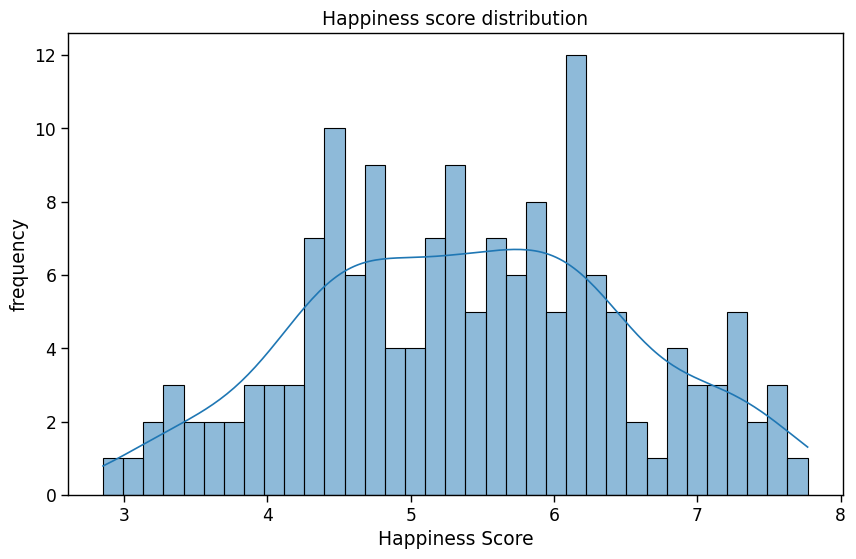

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=35, kde=True)
plt.title('Happiness score distribution')
plt.xlabel('Happiness Score')
plt.ylabel('frequency')
plt.show()

In [30]:
df_filter_high = df.sort_values(by='Score',ascending=False)
df_filter_high = df_filter_high.iloc[0:5]

In [31]:
df_filter_low = df.sort_values(by='Score',ascending=True)
df_filter_low = df_filter_low.iloc[0:5]

Text(0, 0.5, 'Happiness Score')

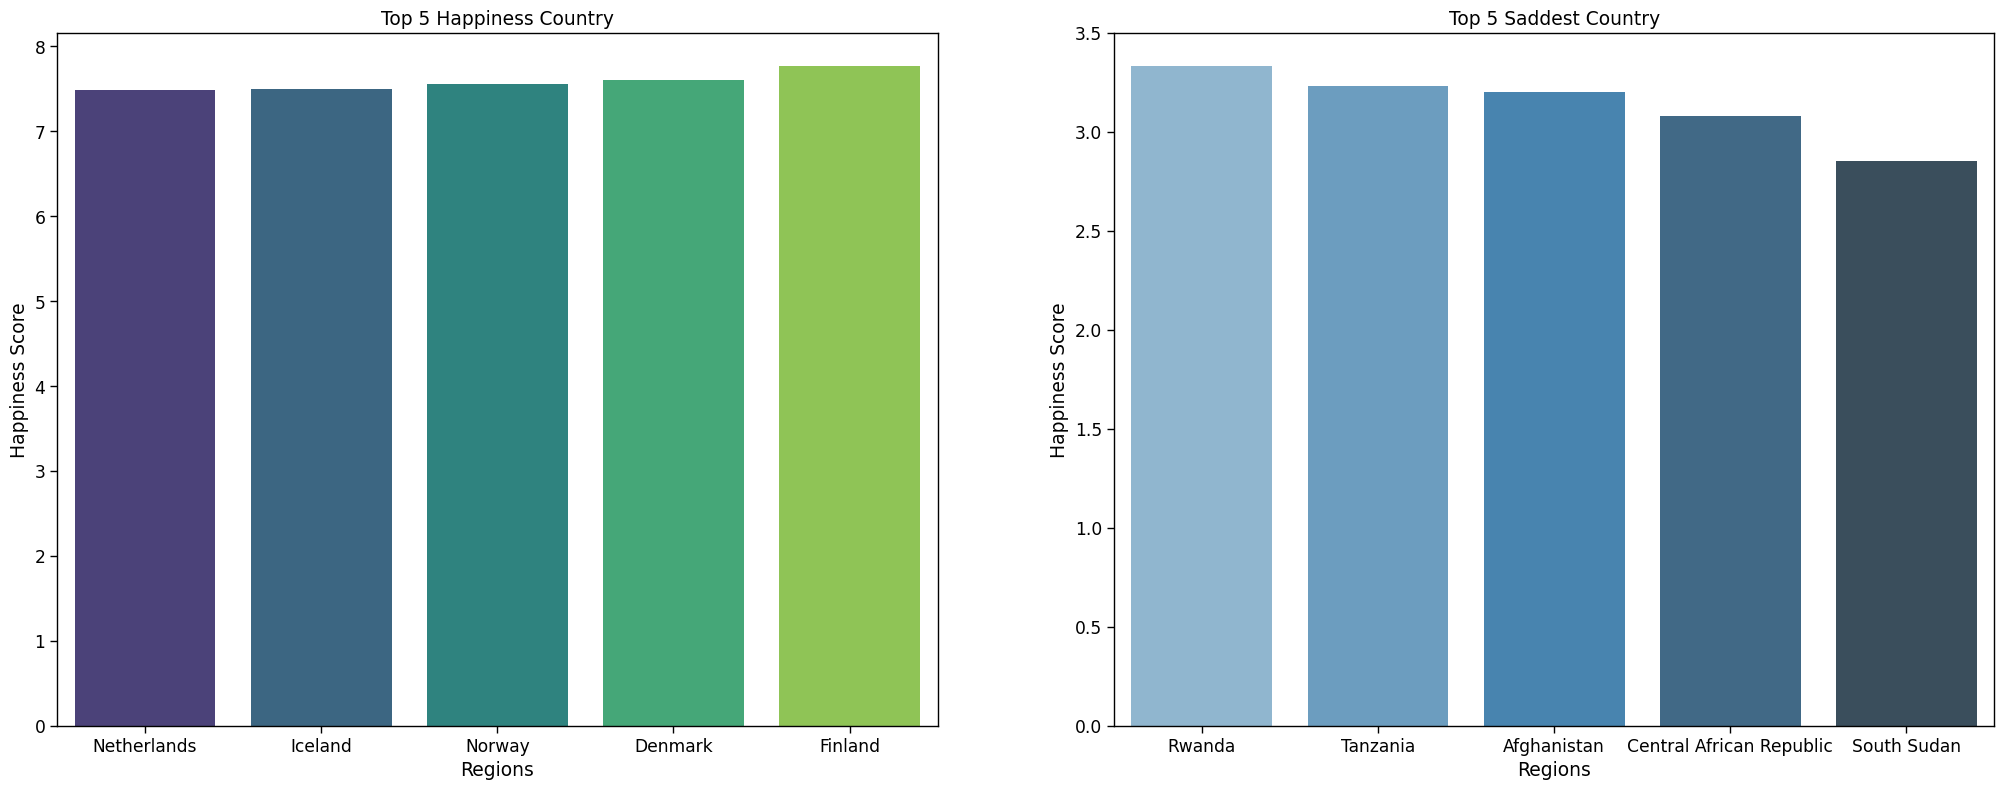

In [32]:
fig,axs = plt.subplots(1,2,figsize=(25,9))
sns.barplot(y='Score', x='Country or region',data=df_filter_high.sort_values(by='Score',ascending=True),palette='viridis',ax = axs[0])
axs[0].set_title('Top 5 Happiness Country')
axs[0].set_xlabel('Regions')
axs[0].set_ylabel('Happiness Score')
sns.barplot(y='Score', x='Country or region',data=df_filter_low.sort_values(by='Score',ascending=False),palette='Blues_d',ax = axs[1])
axs[1].set_title('Top 5 Saddest Country')
axs[1].set_xlabel('Regions')
axs[1].set_ylabel('Happiness Score')

In [33]:
filter_df = df[(df['Country or region'] == 'Finland') | (df['Country or region'] == 'South Sudan')]

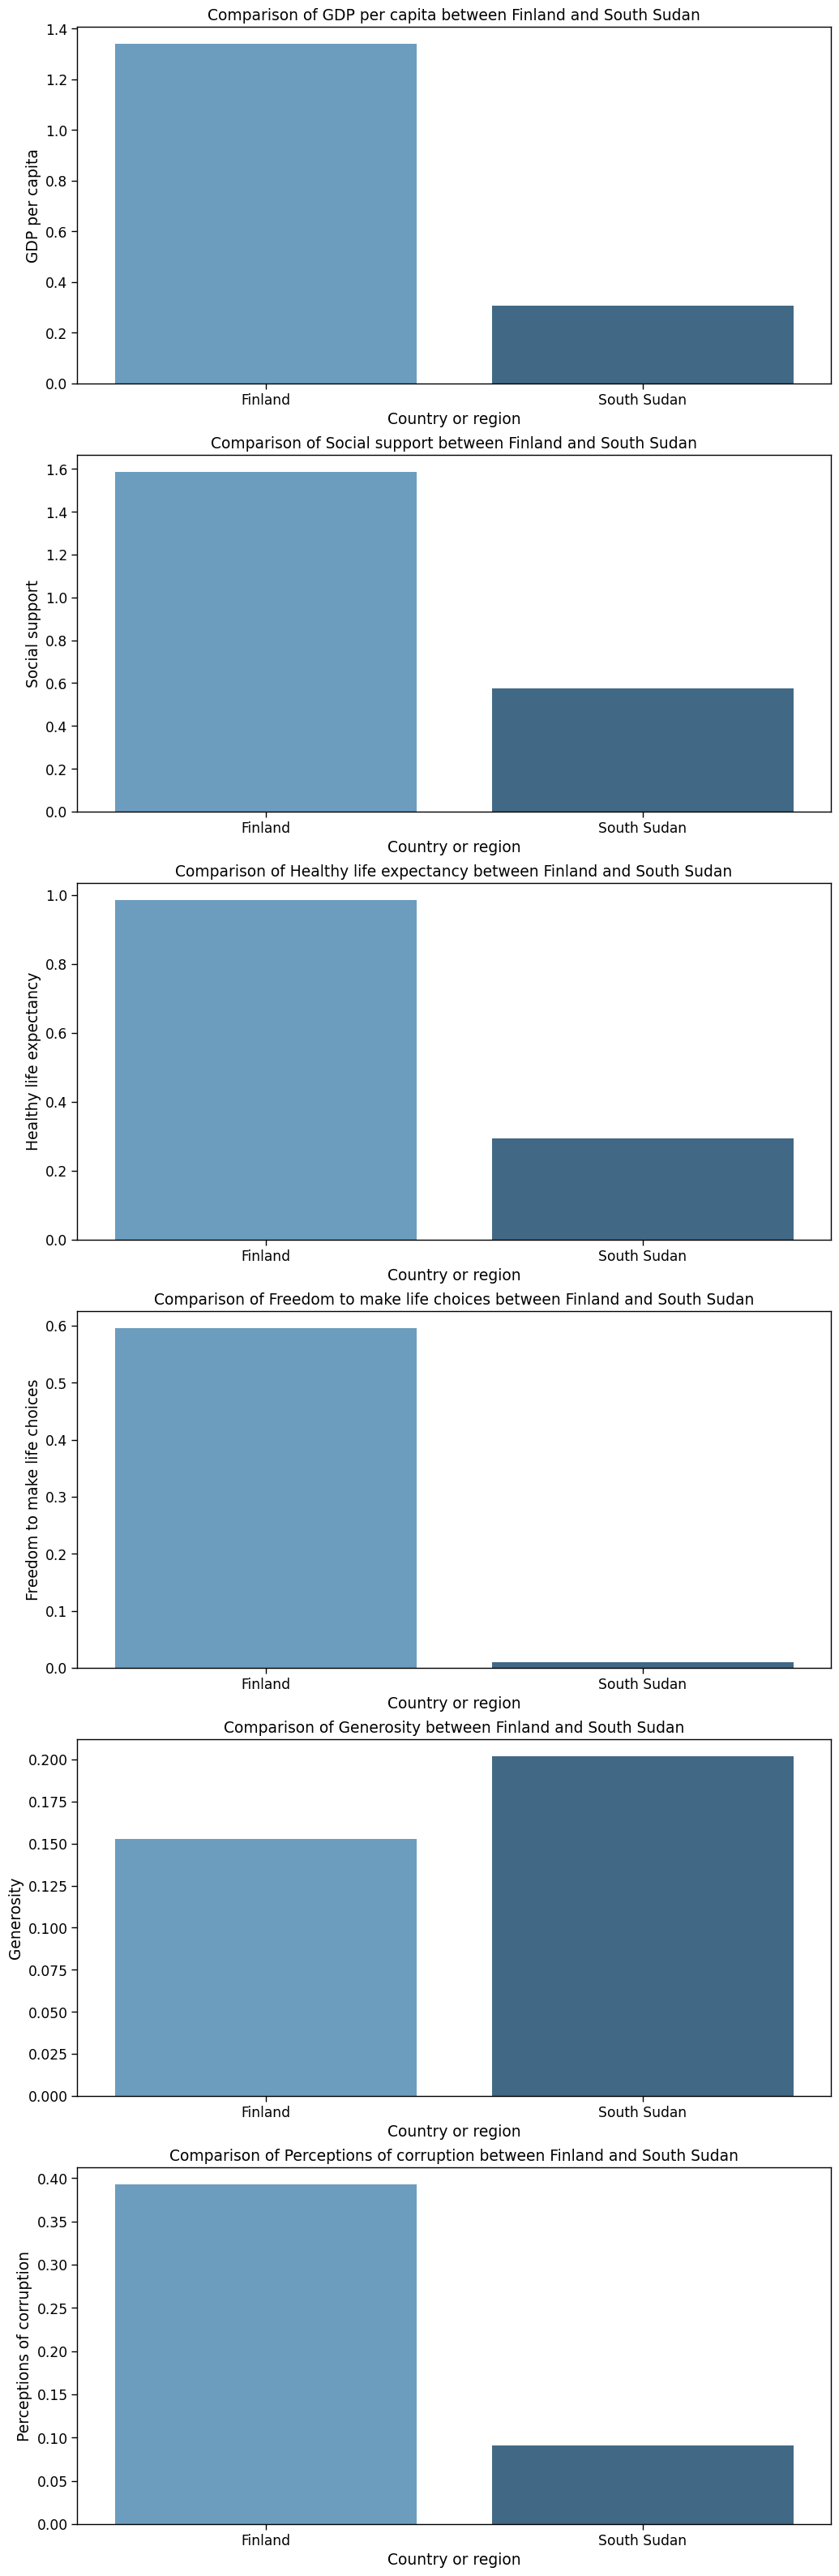

In [34]:
variables = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Criando subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(12, 40))

# Plotando cada variável em um subplot
for i, variable in enumerate(variables):
    sns.barplot(x='Country or region', y=variable, data=filter_df, ax=axes[i],palette='Blues_d')
    axes[i].set_title(f'Comparison of {variable} between Finland and South Sudan')

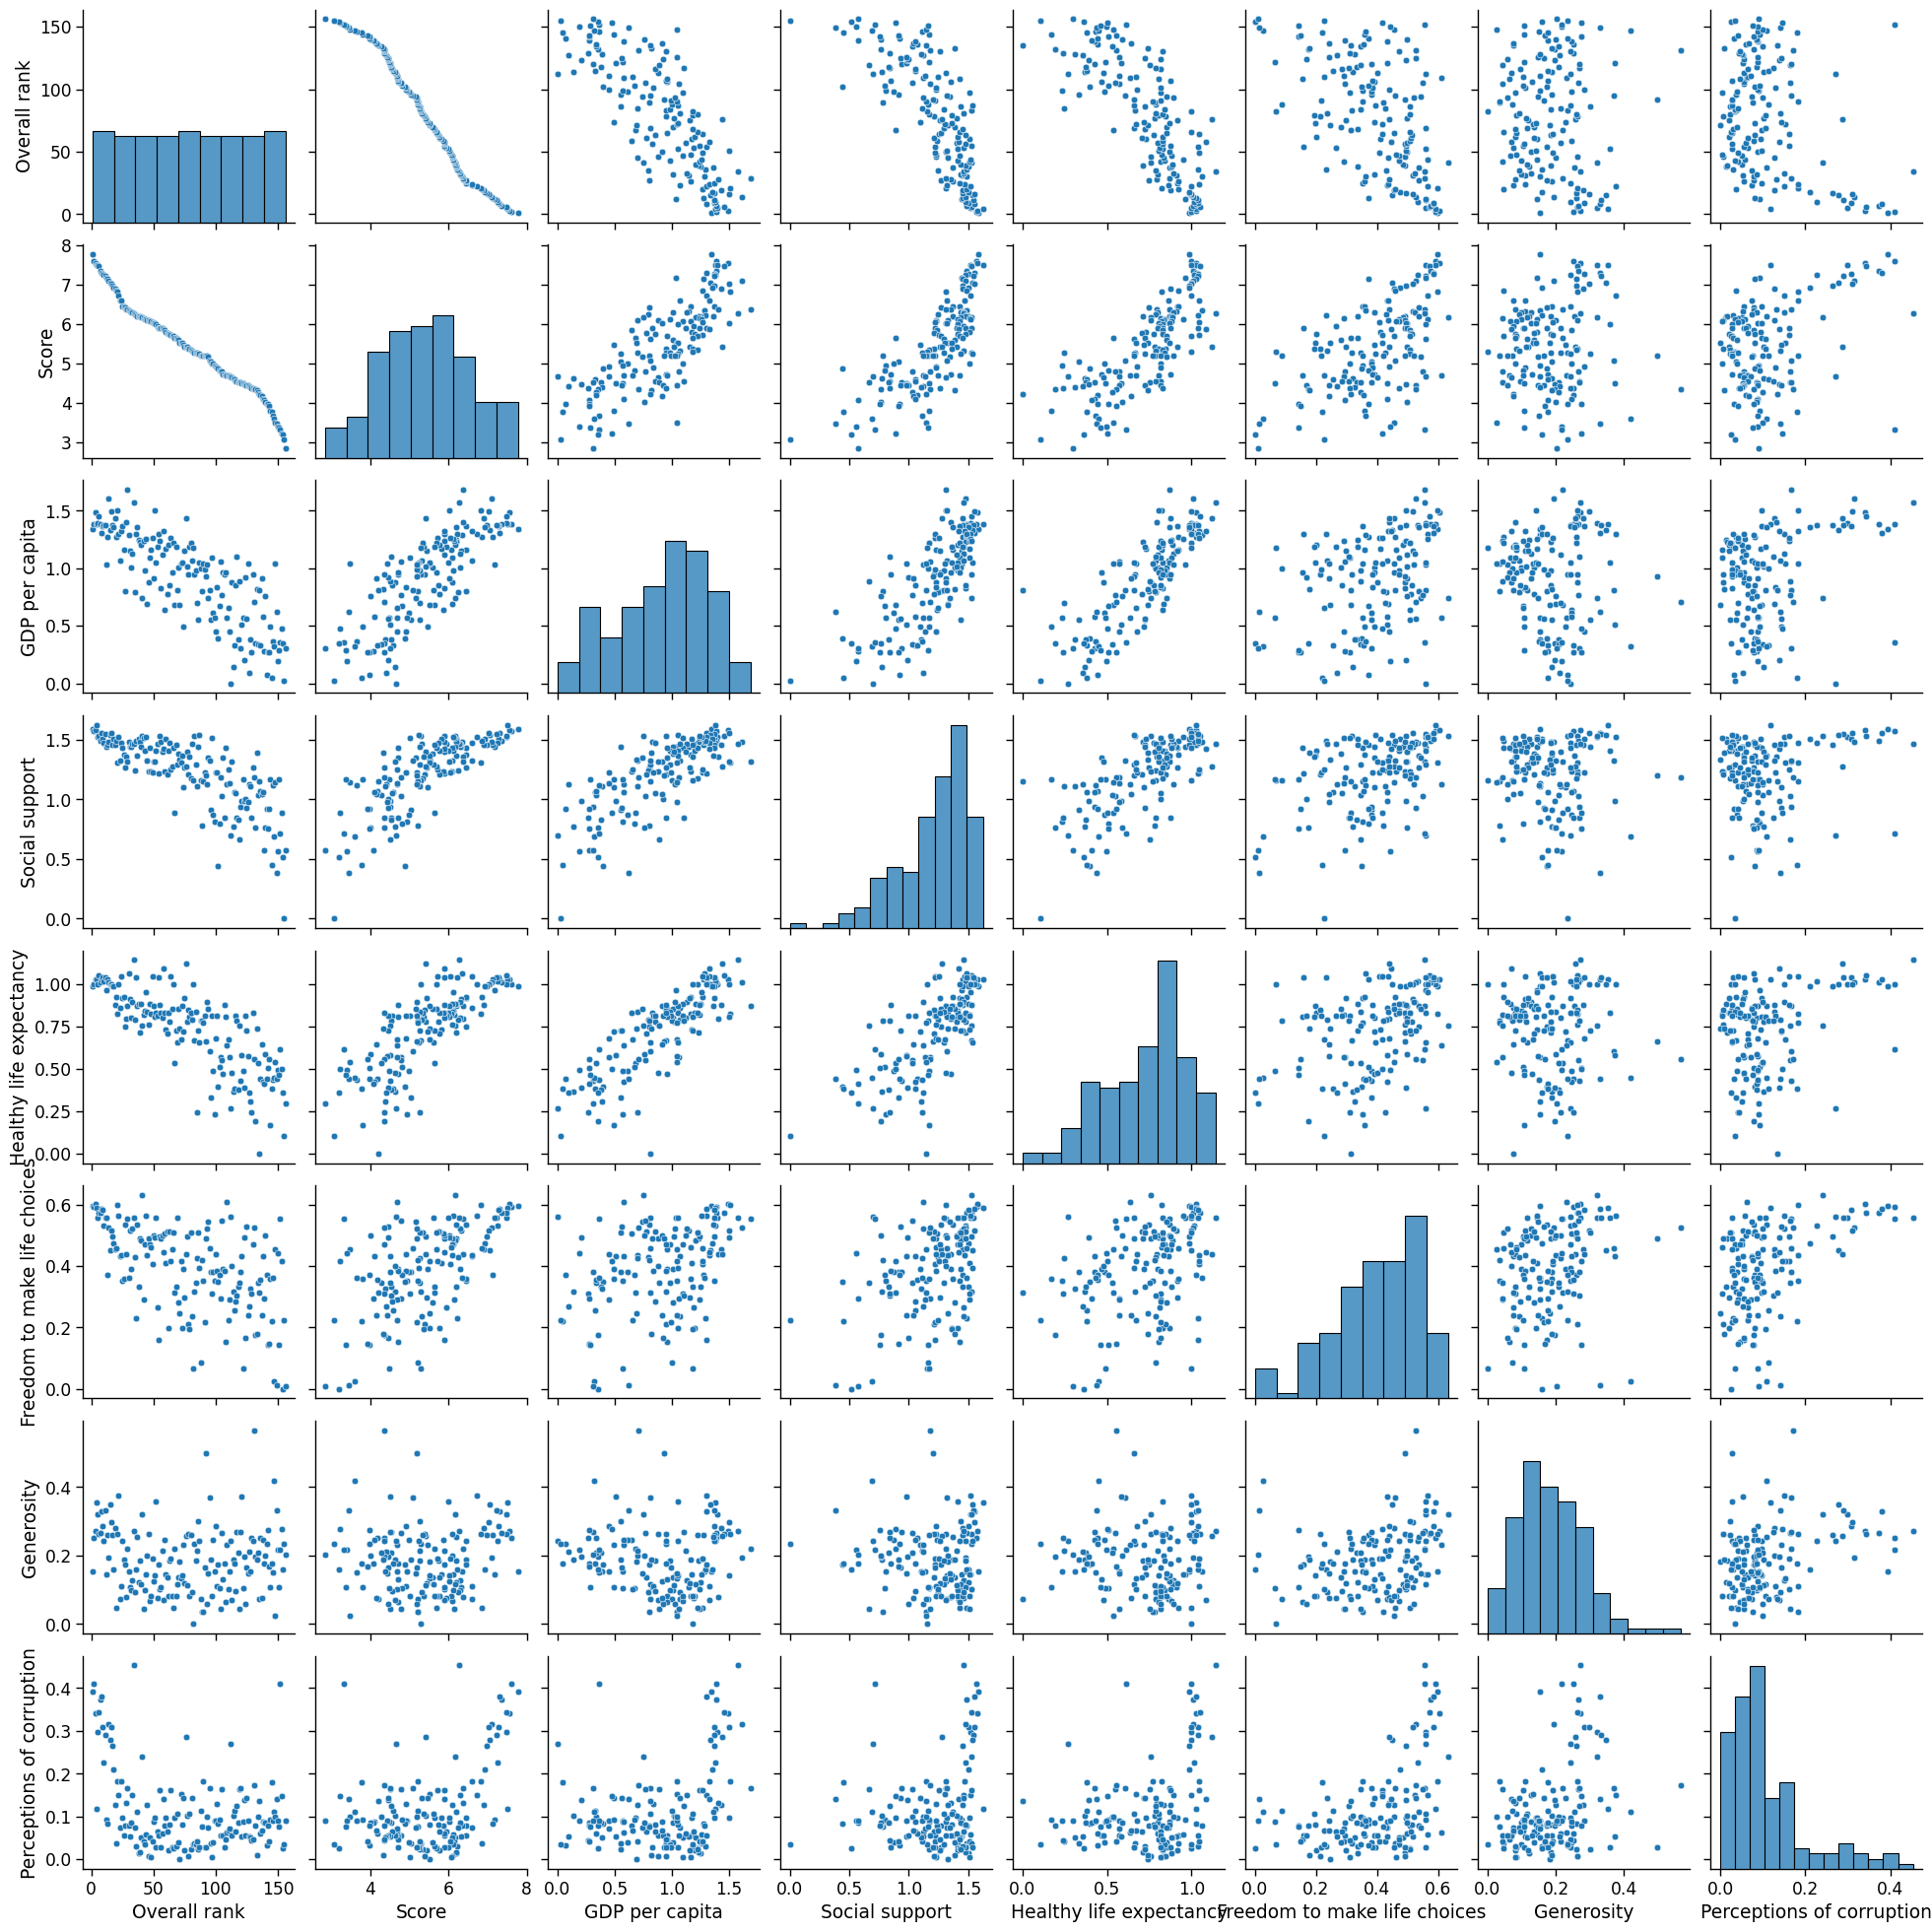

In [35]:
sns.pairplot(df)

In [36]:
df_corr = df[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].corr()

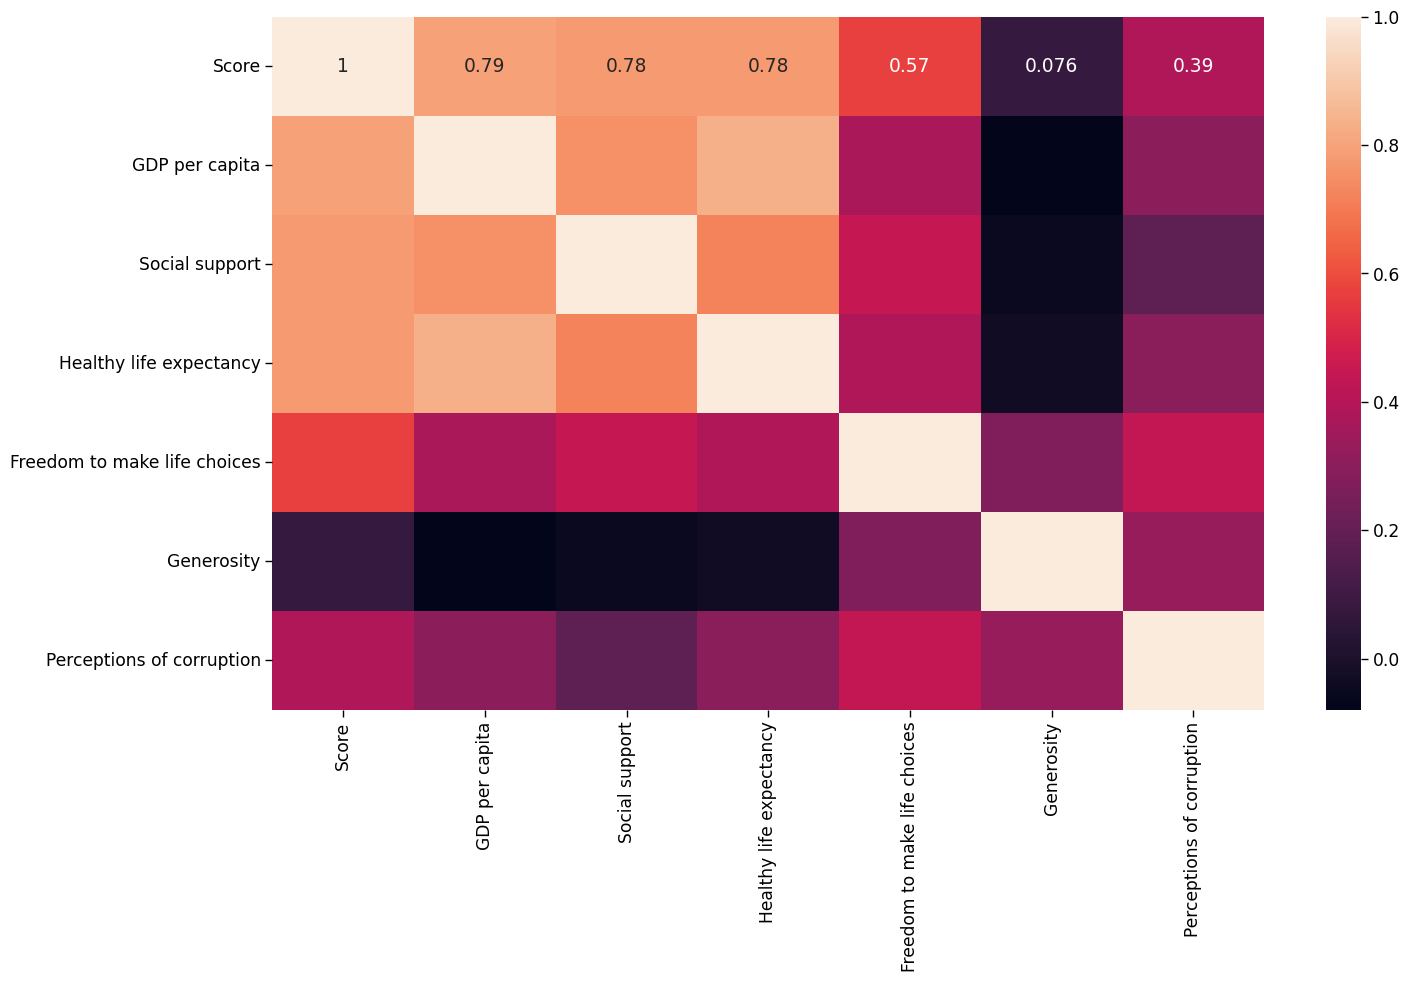

In [37]:
plt.figure(figsize=(16,9))
sns.set_context('paper',font_scale=1.4)
ax = sns.heatmap(df_corr, annot=True)

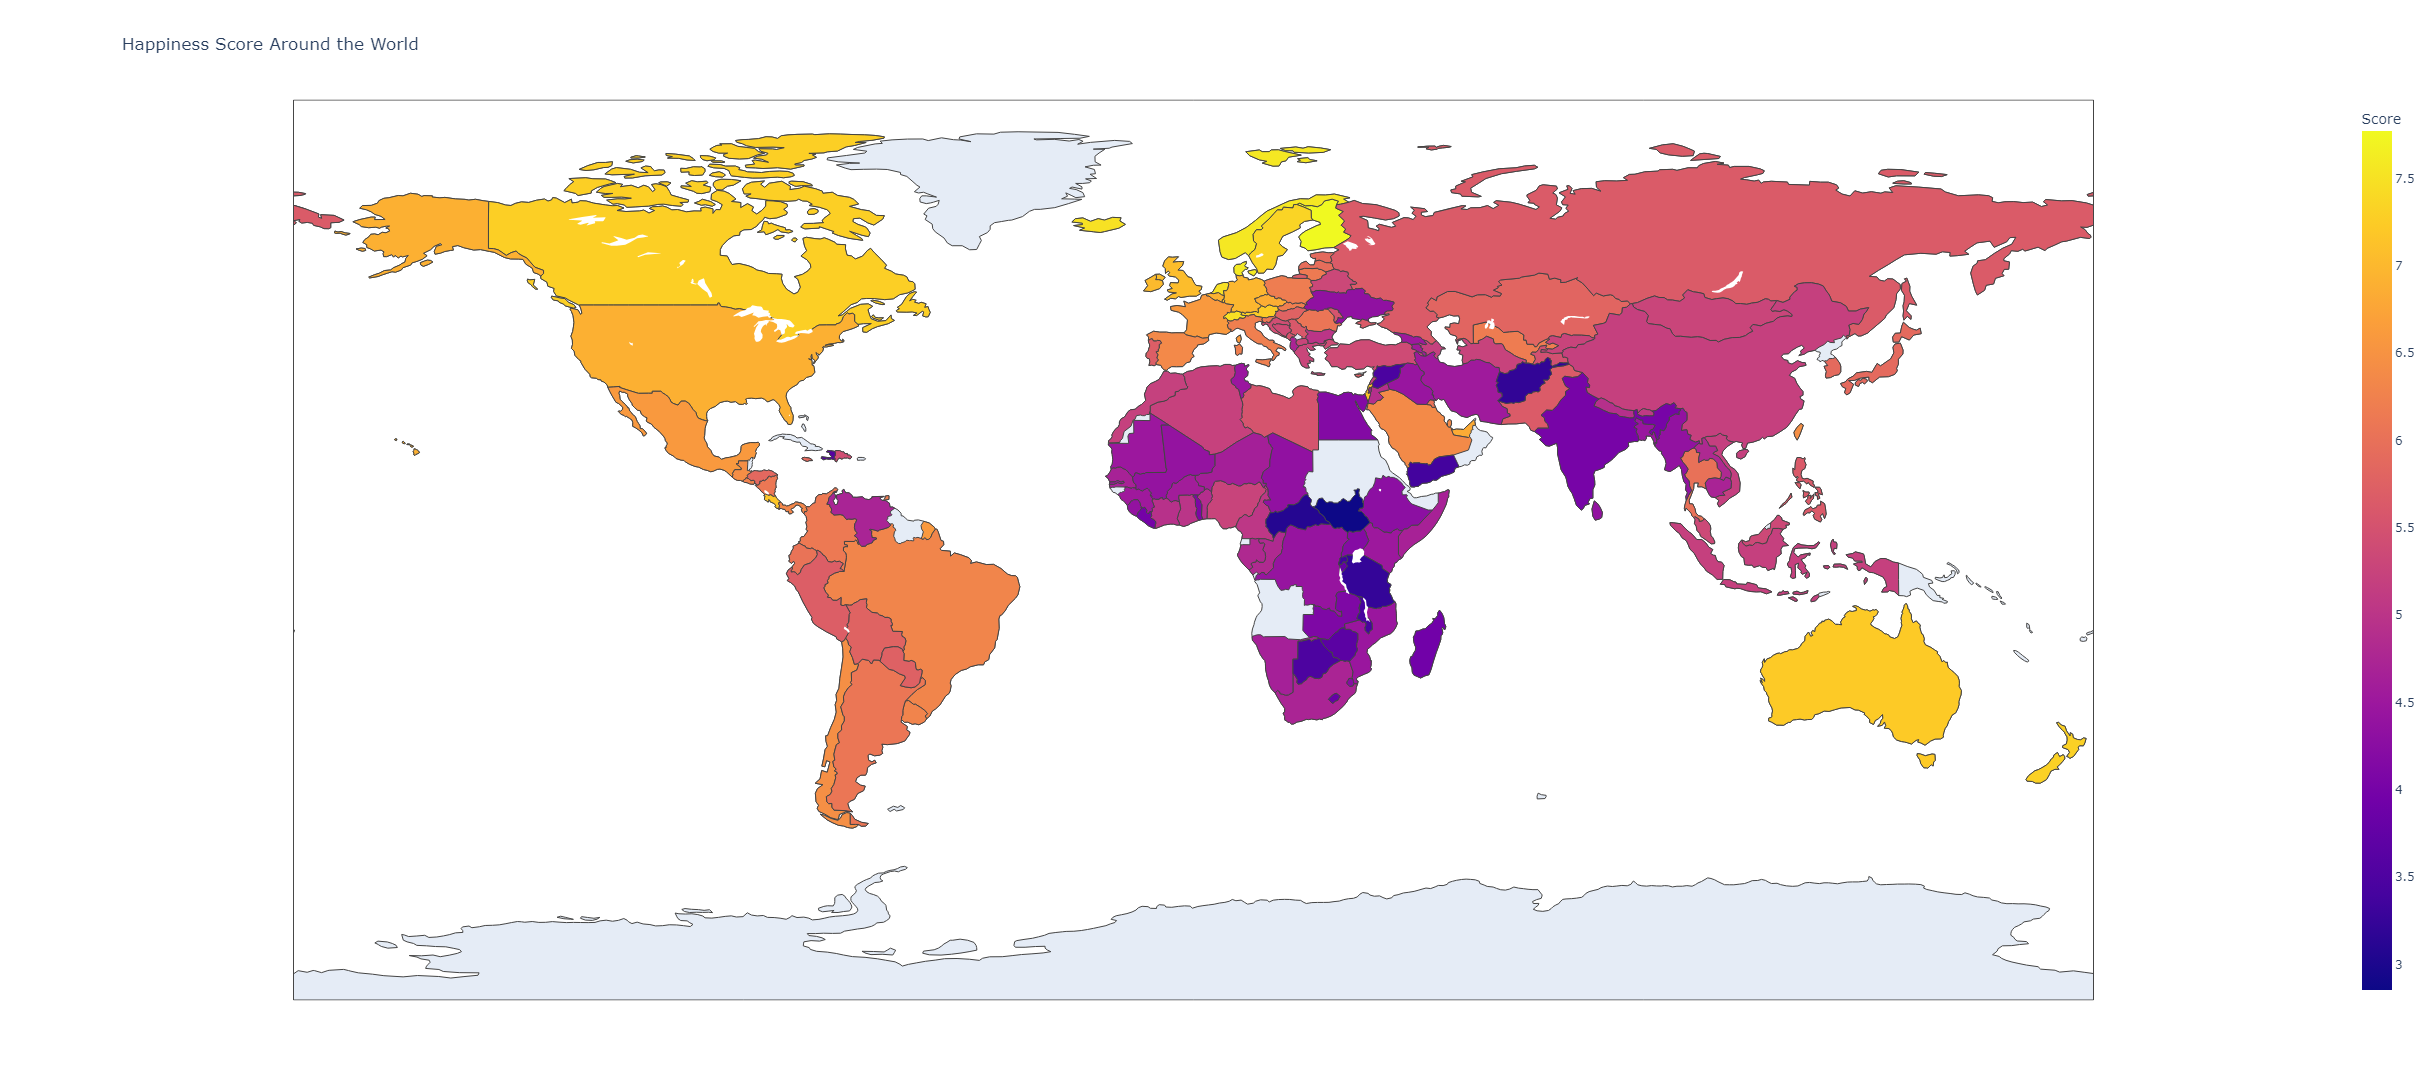

In [38]:
fig = px.choropleth(df,
                    locations='Country or region',
                    locationmode='country names',
                    color='Score',
                    hover_name='Country or region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Happiness Score Around the World',
                    width=1920, 
                    height=1080)
fig.show()

![]()

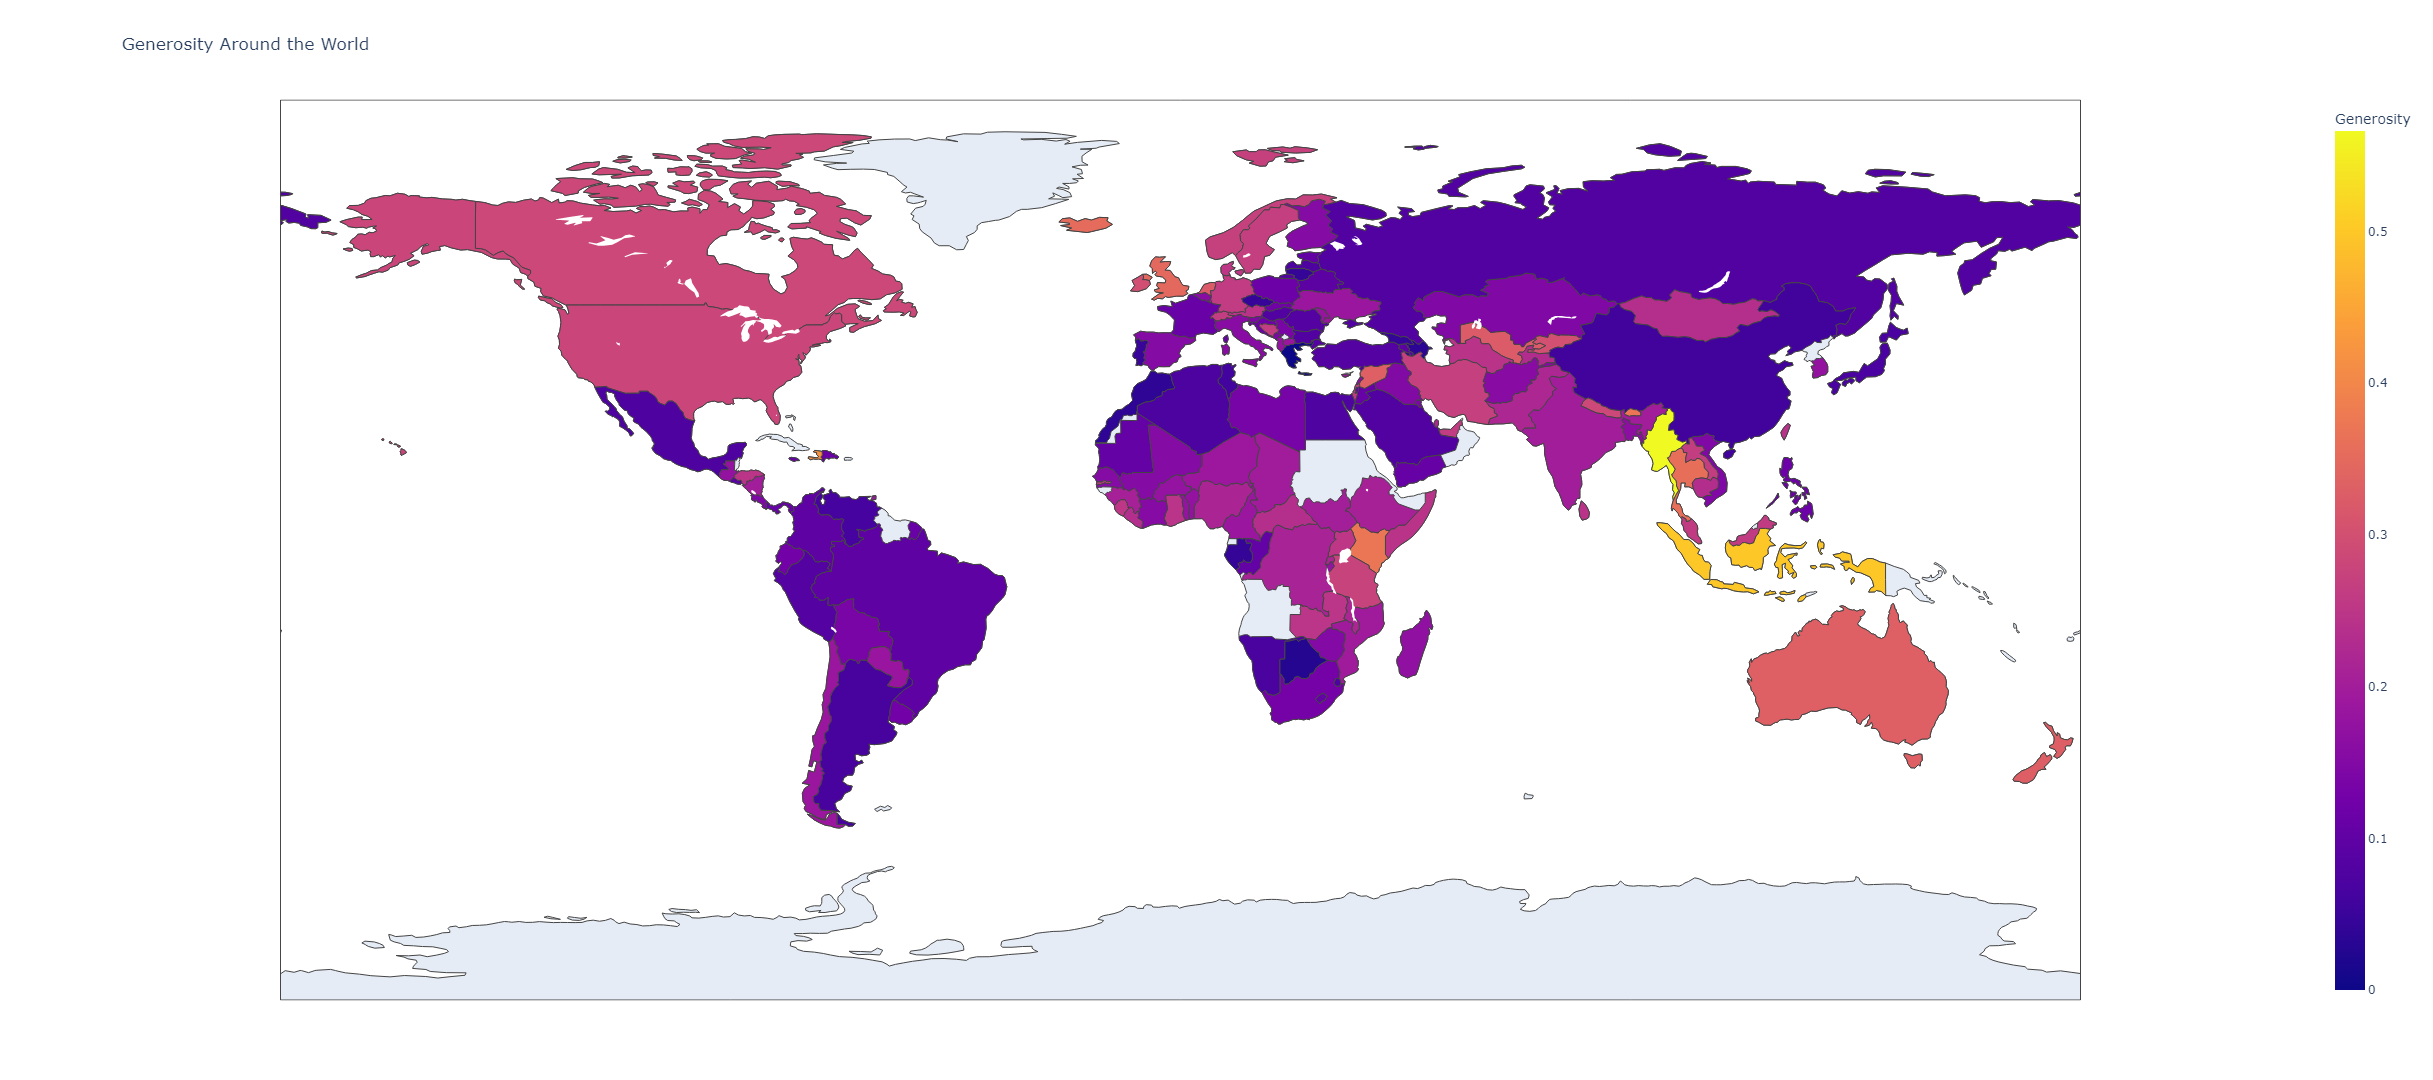

In [39]:
fig = px.choropleth(df,
                    locations='Country or region',
                    locationmode='country names',
                    color='Generosity',
                    hover_name='Country or region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Generosity Around the World',
                    width=1920, 
                    height=1080)
fig.show()

In [40]:
df_filtered = df.sort_values(by='Score', ascending=False)
df_filtered_high = df_filtered.iloc[0:50]
df_filtered_low = df_filtered.iloc[-50:]

Text(0, 0.5, 'Density')

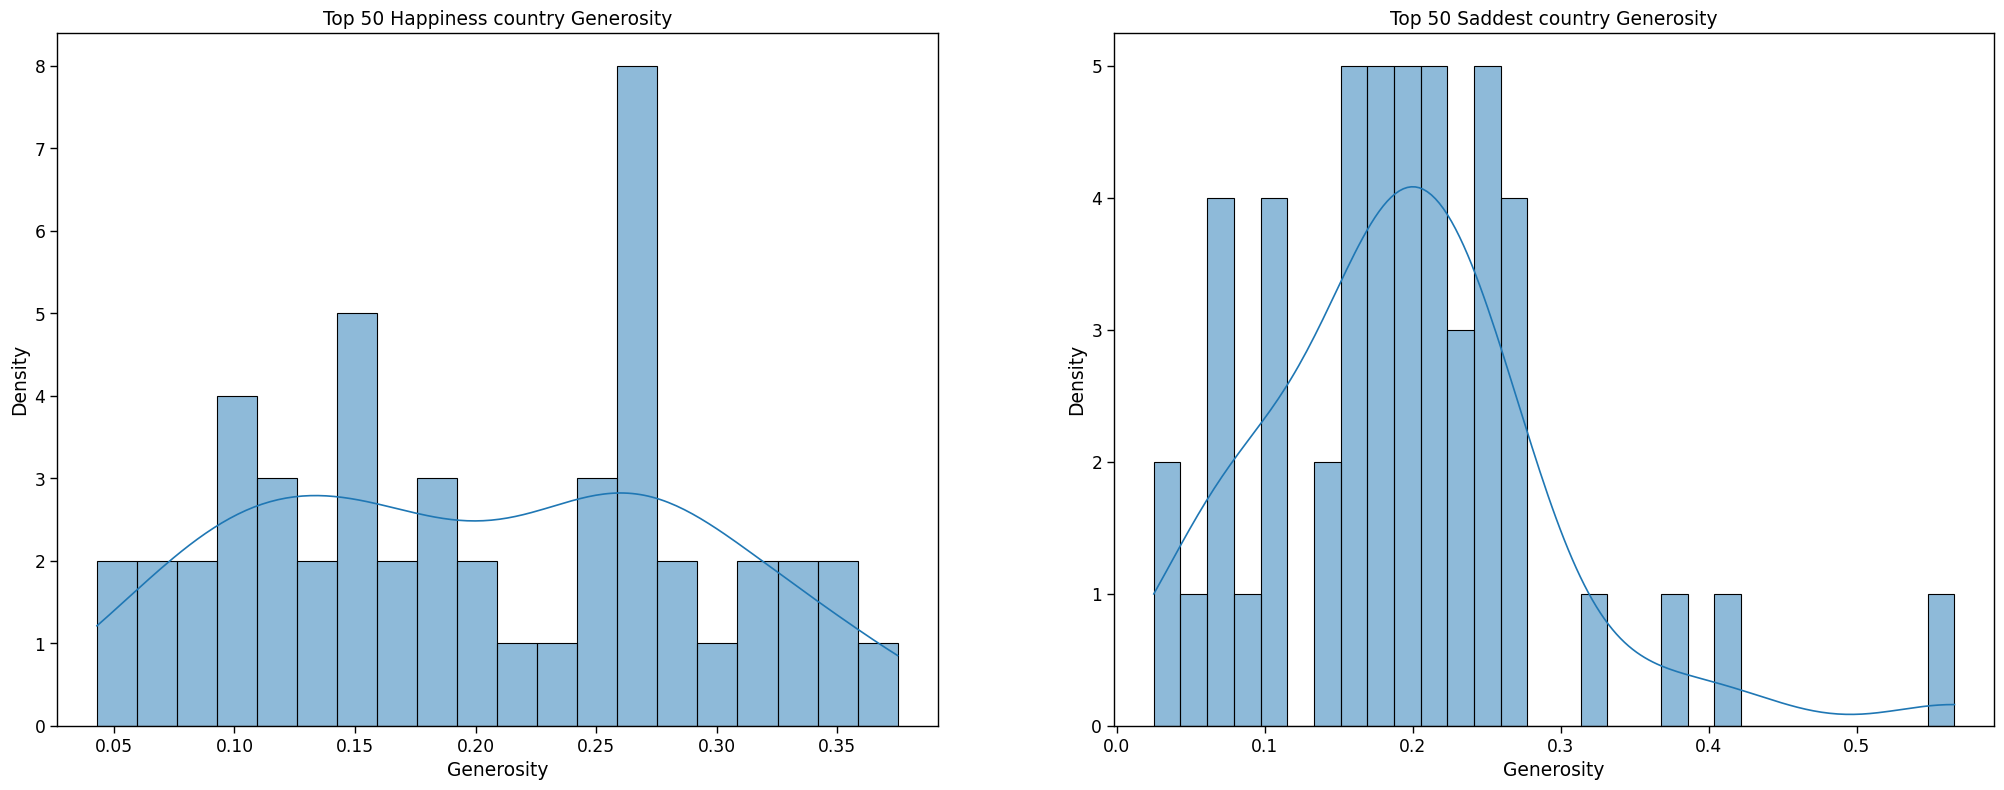

In [41]:
fig, axs = plt.subplots(1,2,figsize=(25,9))
sns.histplot(df_filtered_high['Generosity'], bins=20, kde=True, ax = axs[0])
axs[0].set_title('Top 50 Happiness country Generosity')
axs[0].set_xlabel('Generosity')
axs[0].set_ylabel('Density')
sns.histplot(df_filtered_low['Generosity'], bins=30, kde=True,palette='Blues_d', ax = axs[1])
axs[1].set_title('Top 50 Saddest country Generosity')
axs[1].set_xlabel('Generosity')
axs[1].set_ylabel('Density')